<a href="https://colab.research.google.com/github/Kshitij04Poojary/Google-AI-ML-Internship/blob/main/Unit1/Lab5_Using_Convolutions_With_Complex_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!wget \
  https://storage.googleapis.com/learning-datasets/horse-or-human.zip \
  -O /tmp/horse-or-human.zip

--2024-06-05 11:16:02--  https://storage.googleapis.com/learning-datasets/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.4.207, 172.253.118.207, 74.125.200.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.4.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  22.7MB/s    in 7.4s    

2024-06-05 11:16:10 (19.2 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [16]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

In [17]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

In [18]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])
train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse41-0.png', 'horse45-1.png', 'horse21-5.png', 'horse45-0.png', 'horse10-1.png', 'horse17-9.png', 'horse33-1.png', 'horse49-2.png', 'horse15-1.png', 'horse47-7.png']
['human06-24.png', 'human14-21.png', 'human12-24.png', 'human10-12.png', 'human12-08.png', 'human14-02.png', 'human05-05.png', 'human09-26.png', 'human13-19.png', 'human12-00.png']


In [19]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


In [20]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

Now, display a batch of eight horse pictures and eight human pictures.

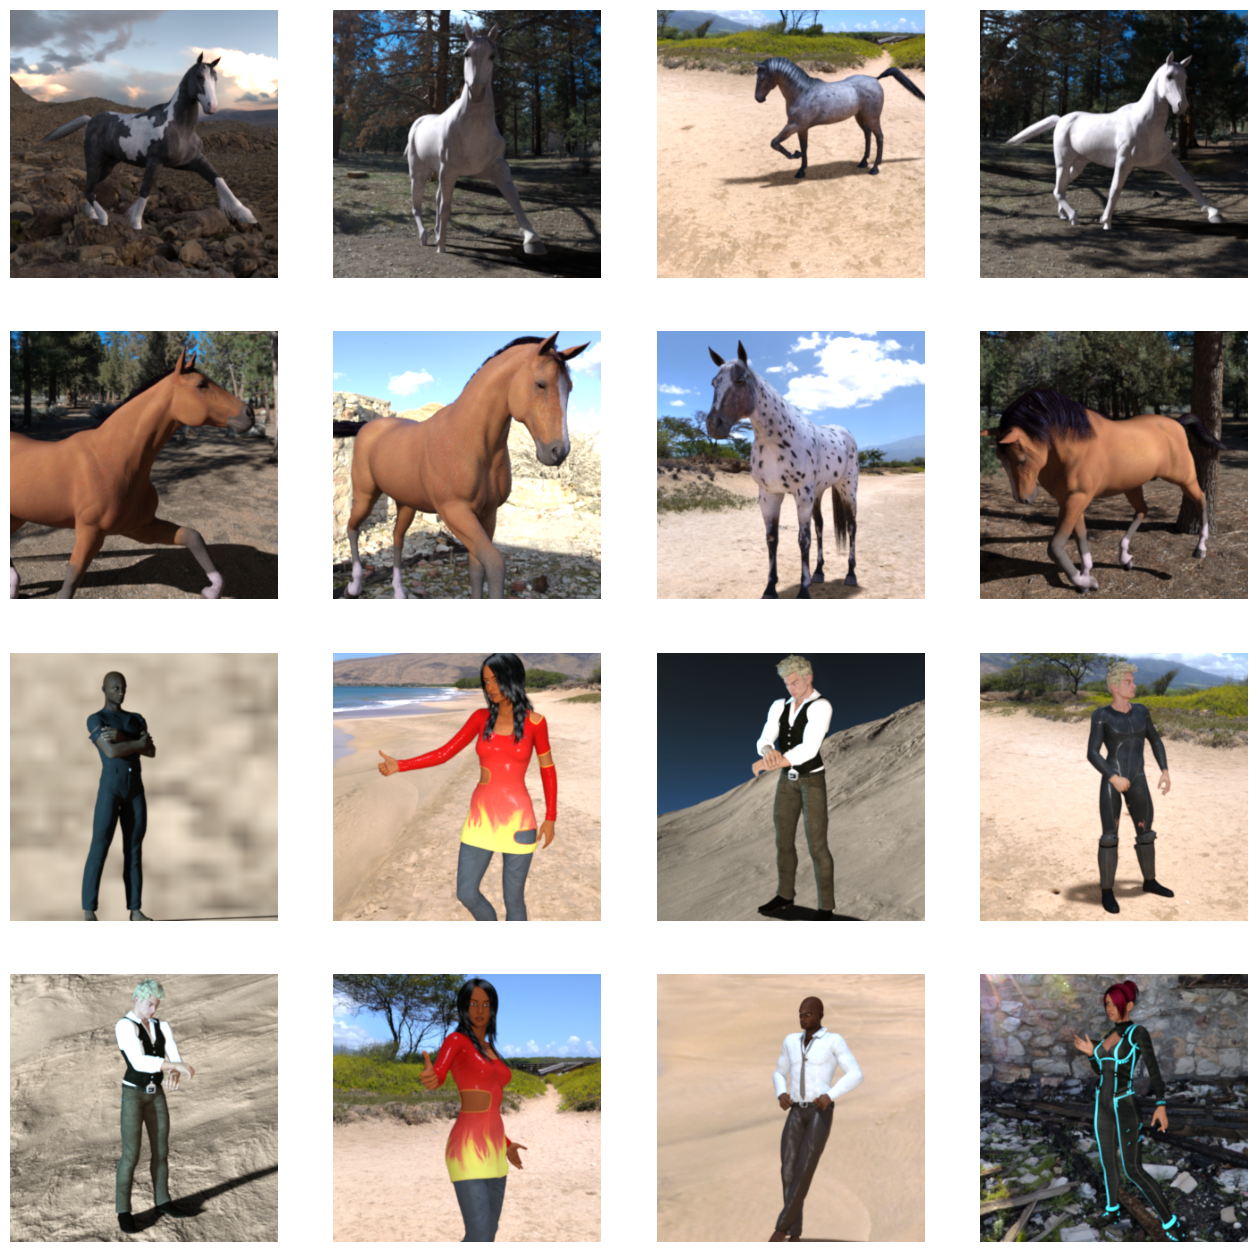

300   300


In [21]:
fig=plt.gcf()
fig.set_size_inches(ncols*4,nrows*4)
pic_index+=8
next_horse_pix=[os.path.join(train_horse_dir,fname) for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) for fname in train_human_names[pic_index-8:pic_index]]

for i,img_path in enumerate(next_horse_pix+next_human_pix):
  sp=plt.subplot(nrows,ncols,i+1)#In matplotlib, the subplots are indexed starting from 1, not 0.
  sp.axis('off')
  img=mpimg.imread(img_path)
  plt.imshow(img)
  height, width = img.shape[:2]

plt.show()
print(height," ",width)

In [22]:
import tensorflow as tf
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 149, 149, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 35, 35, 64)       

In [24]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.


In [26]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,
      epochs=15,
      verbose=1)

Epoch 1/15
8/8 [==============================] - 8s 850ms/step - loss: 1.1243 - acc: 0.4839
Epoch 2/15
8/8 [==============================] - 6s 773ms/step - loss: 0.6820 - acc: 0.5717
Epoch 3/15
8/8 [==============================] - 8s 1s/step - loss: 0.6582 - acc: 0.6652
Epoch 4/15
8/8 [==============================] - 7s 869ms/step - loss: 0.6679 - acc: 0.6429
Epoch 5/15
8/8 [==============================] - 6s 775ms/step - loss: 0.5964 - acc: 0.7586
Epoch 6/15
8/8 [==============================] - 7s 884ms/step - loss: 0.4540 - acc: 0.8176
Epoch 7/15
8/8 [==============================] - 6s 774ms/step - loss: 0.3926 - acc: 0.8687
Epoch 8/15
8/8 [==============================] - 7s 782ms/step - loss: 0.5949 - acc: 0.8587
Epoch 9/15
8/8 [==============================] - 7s 895ms/step - loss: 0.3491 - acc: 0.8509
Epoch 10/15
8/8 [==============================] - 6s 766ms/step - loss: 0.5544 - acc: 0.8732
Epoch 11/15
8/8 [==============================] - 6s 767ms/step - loss:

In [28]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()
for fn in uploaded.keys():
  path='/content/'+fn
  img=image.load_img(path,target_size=(300,300))#Loads the image from the specified path and resizes it to 300x300 pixels (the input size expected by the model).
  x=image.img_to_array(img)#Converts the image to a NumPy array
  x=np.expand_dims(x,axis=0)#Expands the dimensions of the array to include a batch dimension. This is necessary because the model expects a batch of images as input.

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])

  if classes[0]>0.5:
    print(fn+" is a human")
  else:
    print(fn+" is a horse")

Saving horse2.png to horse2 (1).png
1/1 [==============================] - 0s 17ms/step
[4.6993577e-12]
horse2 (1).png is a horse


Visualize intermediate representations

1/1 [==============================] - 0s 101ms/step


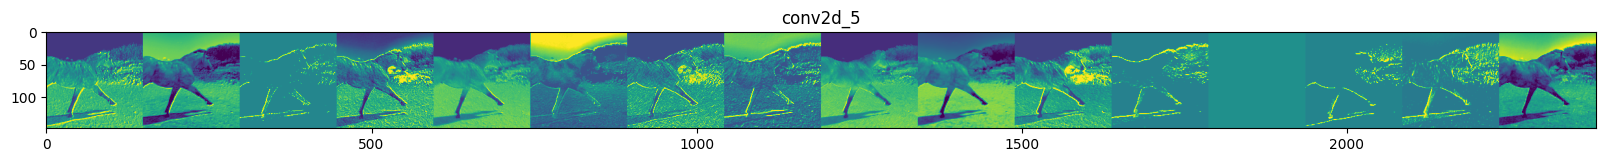

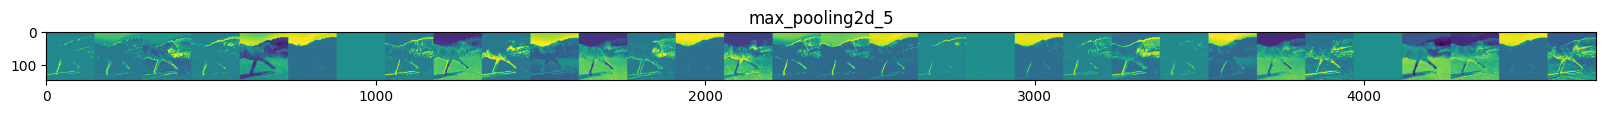

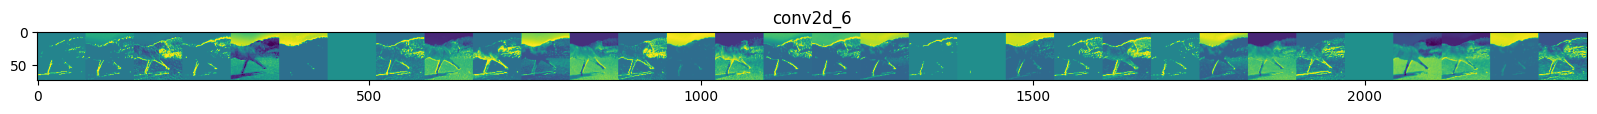

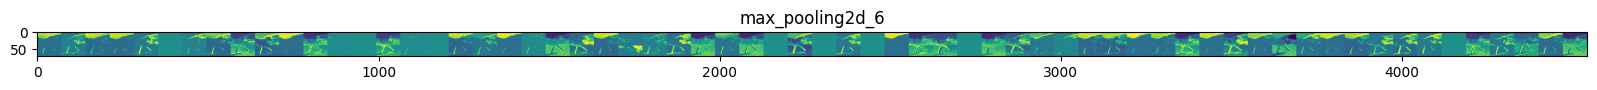

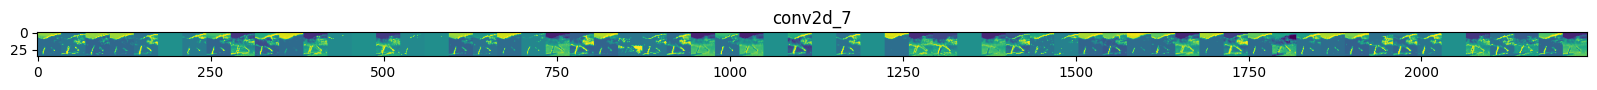

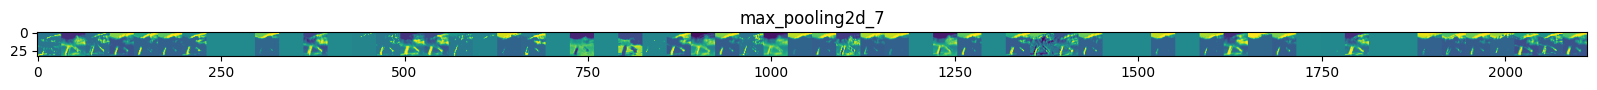

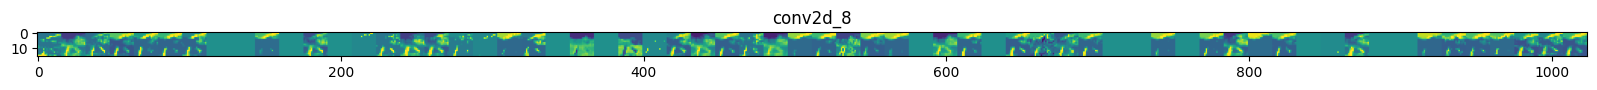

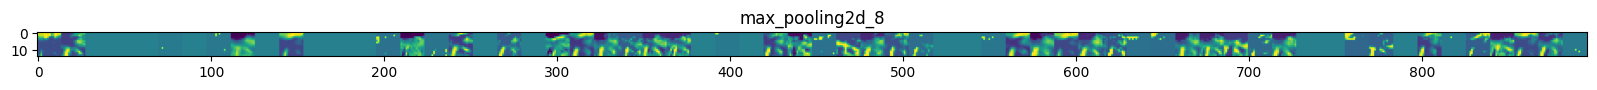

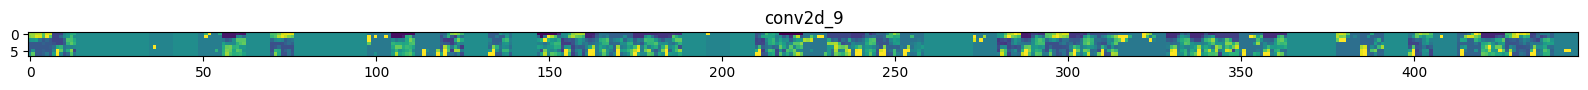

In [29]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      if x.std()>0:
        x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')